[[0.   1.19 1.   1.   1.19 1.19 1.19 1.   1.19 1.19 1.19 1.  ]
 [1.19 0.   0.   0.   1.19 1.19 1.19 0.   1.19 1.19 1.19 0.  ]
 [1.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [1.19 1.19 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.19 1.19 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.19 1.19 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.19 1.19 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.19 1.19 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.19 1.19 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
w above
case = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] cost = 0.0
case = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] cost = 12.329999999999998
case = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] cost = 8.329999999999998
case = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

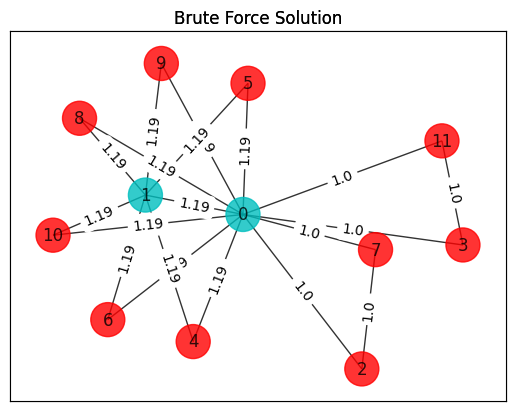

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import datetime

# Setting a variable to the current time using now()
current_time = datetime.datetime.now()

# Generating a graph of n nodes
n=12 # Number of nodes in graph
G=nx.Graph()
G.add_nodes_from(np.arange(0,n,1))
elist=[ 

    (0,1,1.19), 

    (0,2,1.0), 

    (0,3,1.0), 

    (0,4,1.19), 

    (0,5,1.19), 

    (0,6,1.19), 

    (0,7,1.0), 

    (0,8,1.19), 

    (0,9,1.19), 

    (0,10,1.19), 

    (0,11,1.0), 

    (1,0,1.19), 

    (1,4,1.19), 

    (1,5,1.19), 

    (1,6,1.19), 

    (1,8,1.19), 

    (1,9,1.19), 

    (1,10,1.19), 

    (2,0,1.0), 

    (2,7,1.0), 

    (3,0,1.0), 

    (3,11,1.0), 

    (4,0,1.19), 

    (4,1,1.19), 

    (5,0,1.19), 

    (5,1,1.19), 

    (6,0,1.19), 

    (6,1,1.19), 

    (7,0,1.0), 

    (7,2,1.0), 

    (8,0,1.19), 

    (8,1,1.19), 

    (9,0,1.19), 

    (9,1,1.19), 

    (10,0,1.19), 

    (10,1,1.19), 

    (11,0,1.0), 

    (11,3,1.0)]

# tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(elist)


colors = ['r' for node in G.nodes()]
pos = nx.spring_layout(G)

def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    # Titles Graph
    plot_title = "Brute Force Solution"
    
    # Label variable for X-axis
    xax = ""
    
    # Label variable for Y-axis
    yax = ""
    
    # Calls to title
    plt.title(plot_title)
    plt.xlabel(xax)
    plt.ylabel(yax)
    
    # Main drawing call of the graph
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
    
    # edge_color : color or array of colors (default='k')
    # Find a way to make cut lines into dotted lines
    
    # Create 2 edgelists. 1 with the non-cut edges, and another with only the cut edges
    
    # cut_edges = [(u, v) for u, v in G.edges if lut[u] != lut[v]]
    # uncut_edges = [(u, v) for u, v in G.edges if lut[u] == lut[v]]
    
    # nx.draw_networkx_edges(G, pos, edgelist=cut_edges,
    #                       style='dashdot', alpha=0.5, width=3)
    # nx.draw_networkx_edges(G, pos, edgelist=uncut_edges, style='solid', width=3)


# Executing our draw_graph function to draw the graph
draw_graph(G, colors, pos)

""" # Formats date for use in file saving
curTime = current_time.hour + ":" + current_time.minute + "_" + current_time.month + "/" + current_time.date + "/" + current_time.year
nx.draw(draw_graph(G, colors, pos))

# Saves graph as file in directory with timestamp
plt.savefig("BestBrute" + curTime ".png") """

# Computing the weight matrix from the random graph
w = np.zeros([n,n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i,j,default=0)
        if temp != 0:
            w[i,j] = temp['weight']
print(w)
print("w above")

best_cost_brute = 0
for b in range(2**n):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n)))]
    cost = 0
    for i in range(n):
        for j in range(n):
            cost = cost + w[i,j]*x[i]*(1-x[j])
    if best_cost_brute < cost:
        best_cost_brute = cost
        xbest_brute = x
    print('case = ' + str(x)+ ' cost = ' + str(cost))

colors = ['r' if xbest_brute[i] == 0 else 'c' for i in range(n)]

# Final draw of graph
draw_graph(G, colors, pos)
print('\nBest solution = ' + str(xbest_brute) + ' cost = ' + str(best_cost_brute))

In [2]:
## Variation Quantum Eigensolver

#Source: https://qiskit.org/documentation/optimization/tutorials/06_examples_max_cut_and_tsp.html

# Some helpful documentation link:
#  * https://qiskit.org/documentation/stubs/qiskit.algorithms.VQE.html#qiskit.algorithms.VQE

0.595 * IIIIIIIIIIZZ
+ 0.5 * IIIIIIIIIZIZ
+ 0.5 * IIIIIIIIZIIZ
+ 0.595 * IIIIIIIZIIIZ
+ 0.595 * IIIIIIIZIIZI
+ 0.595 * IIIIIIZIIIIZ
+ 0.595 * IIIIIIZIIIZI
+ 0.595 * IIIIIZIIIIIZ
+ 0.595 * IIIIIZIIIIZI
+ 0.5 * IIIIZIIIIIIZ
+ 0.5 * IIIIZIIIIZII
+ 0.595 * IIIZIIIIIIIZ
+ 0.595 * IIIZIIIIIIZI
+ 0.595 * IIZIIIIIIIIZ
+ 0.595 * IIZIIIIIIIZI
+ 0.595 * IZIIIIIIIIIZ
+ 0.595 * IZIIIIIIIIZI
+ 0.5 * ZIIIIIIIIIIZ
+ 0.5 * ZIIIIIIIZIII


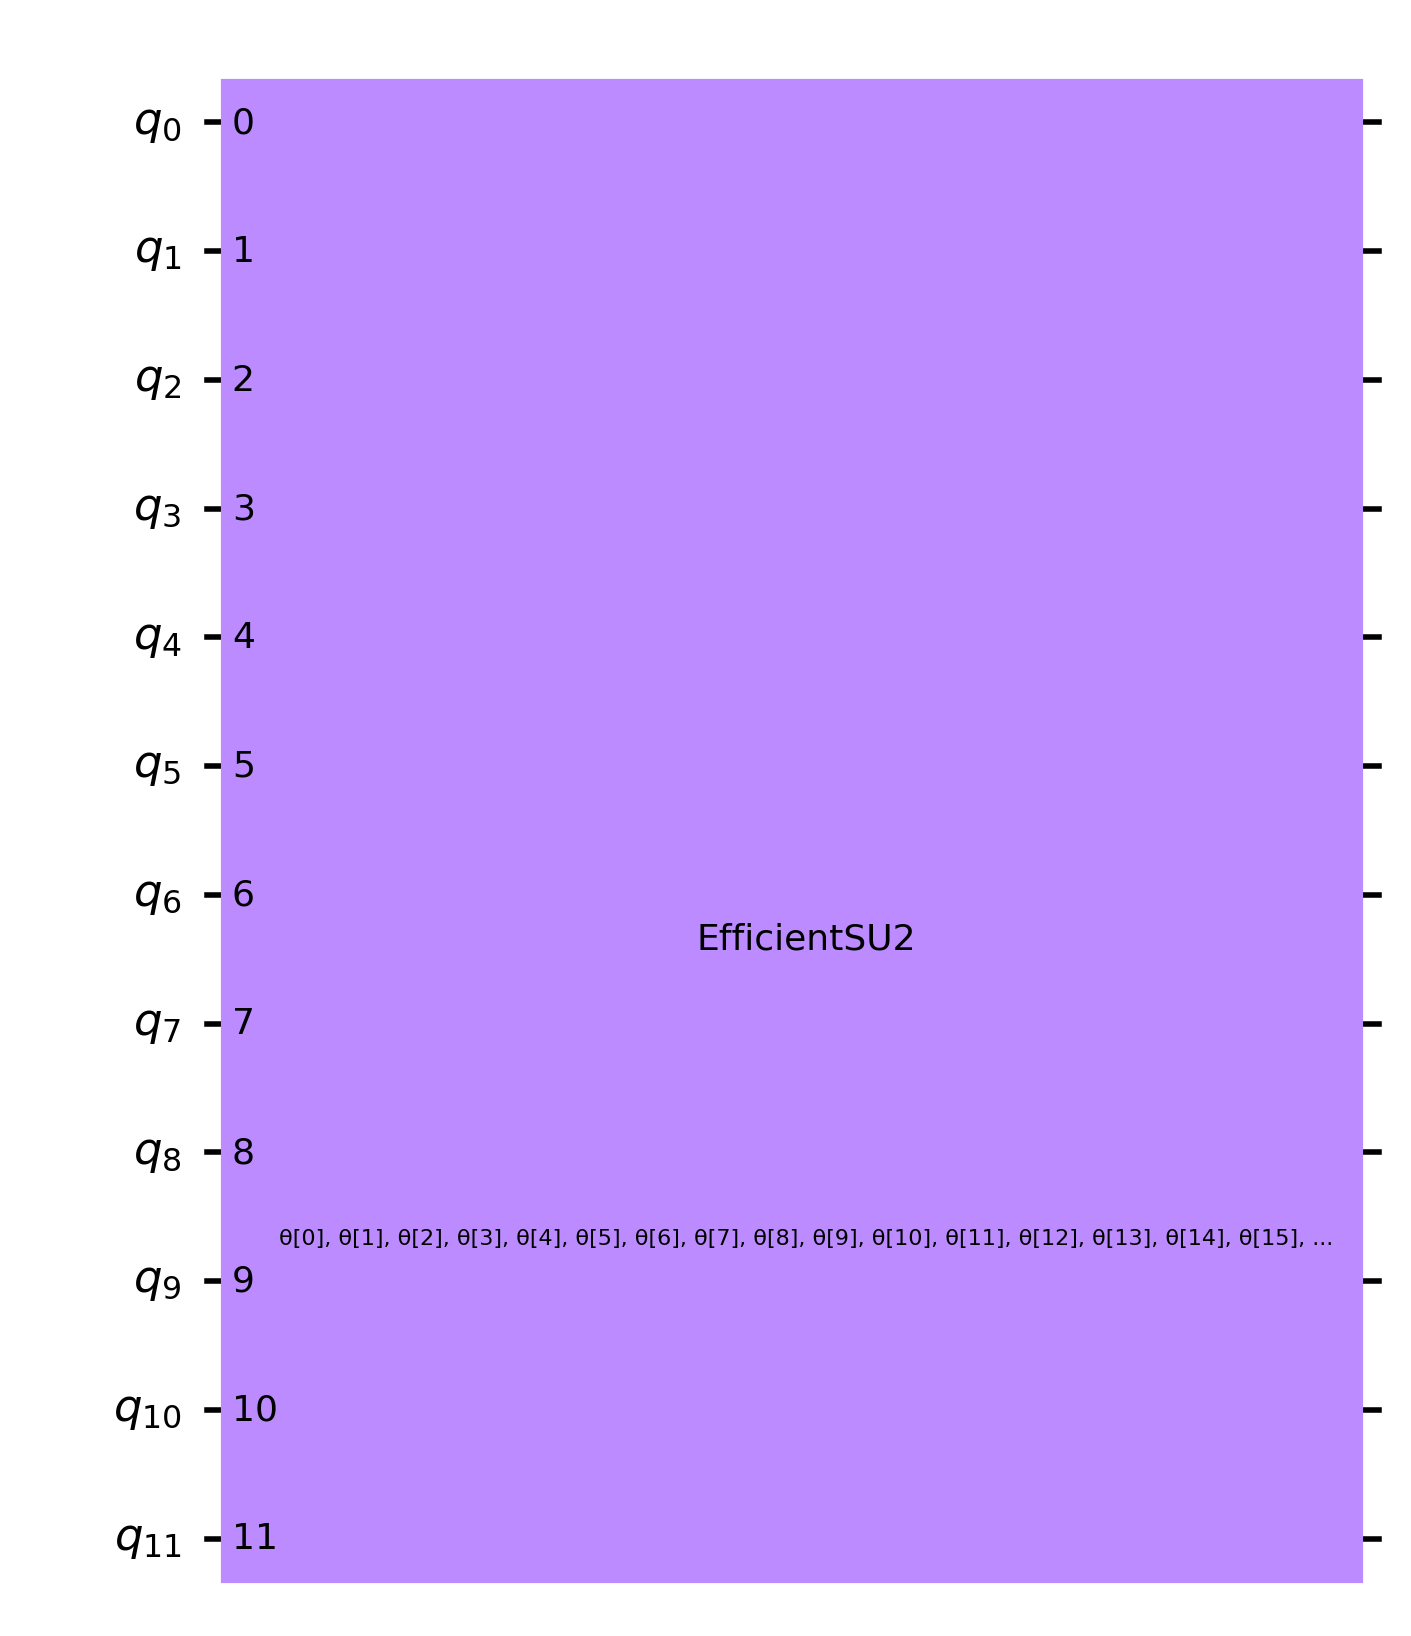

In [3]:
# General imports
import time
import numpy as np

# VQE Imports
from qiskit.algorithms.minimum_eigensolvers import VQE
from qiskit.algorithms.optimizers import OptimizerResult
from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import SPSA
from qiskit.primitives import Estimator
# from qiskit_aer.primitives import Estimator as AerEstimator
from qiskit.circuit.library import EfficientSU2



# SciPy minimizer routine
from scipy.optimize import minimize

# Pre-defined ansatz circuit and operator class for Hamiltonian (Unused)
from qiskit.circuit.library import TwoLocal
from qiskit.quantum_info import SparsePauliOp

# The IBM Qiskit Runtime
from qiskit_ibm_runtime import (QiskitRuntimeService, Session,
                                Estimator as RuntimeEstimator)
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Session, Options
service = QiskitRuntimeService()

# Desired instance goes here, 
# for running jobs on the quantum machine, use "ibm_guadalupe"
# For running jobs on a simulator, use "simulator_statevector"
backend = "simulator_statevector"

# Plotting functions
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# Maxcut import
from qiskit_optimization.applications import Maxcut


# Define our Qiskit Maxcut Instance
max_cut = Maxcut(w)
qp = max_cut.to_quadratic_program()

# Translate to Ising Hamiltonian
qubitOp, offset = qp.to_ising()

# Construct VQE
# opt = SPSA(maxiter=300)
# ansatz = TwoLocal(qubitOp.num_qubits, 'ry', 'cz', reps=5, entanglement='linear')

# estimator = Estimator(options={"shots": 2048})
# seed = 10598
print(qubitOp)


# Note: Look into using different ansatz than EfficientSU2, as some may be a better fit for our application
ansatz = EfficientSU2(qubitOp.num_qubits)
ansatz.draw("mpl")

In [4]:
from qiskit.circuit.library import EfficientSU2
from qiskit.algorithms import MinimumEigensolver, VQEResult, EigensolverResult

qc = EfficientSU2(num_qubits=qubitOp.num_qubits, reps=1)

qc_with_meas = qc.measure_all(inplace=False)
qc_with_meas.decompose().draw(fold=120)

┌──────────┐┌───────────┐                                                                                   »
    q_0: ─┤ Ry(θ[0]) ├┤ Rz(θ[12]) ├───────────────────────────────────────────────────────────────────────────────────»
          ├──────────┤├───────────┤                                                                                   »
    q_1: ─┤ Ry(θ[1]) ├┤ Rz(θ[13]) ├───────────────────────────────────────────────────────────────────────────────────»
          ├──────────┤├───────────┤                                                                                   »
    q_2: ─┤ Ry(θ[2]) ├┤ Rz(θ[14]) ├───────────────────────────────────────────────────────────────────────────────────»
          ├──────────┤├───────────┤                                                                                   »
    q_3: ─┤ Ry(θ[3]) ├┤ Rz(θ[15]) ├───────────────────────────────────────────────────────────────────────────────────»
          ├──────────┤├───────────┤                                                                                   »
    q_4: ─┤ Ry(θ[4]) ├┤ Rz(θ[16]) ├────────────────────────────────────────────────────────────────────────────■──────»
          ├──────────┤├───────────┤                                                                          ┌─┴─┐    »
    q_5: ─┤ Ry(θ[5]) ├┤ Rz(θ[17]) ├───────────────────────────────────────────────────────────────■──────────┤ X ├────»
          ├──────────┤├───────────┤                                                             ┌─┴─┐    ┌───┴───┴───┐»
    q_6: ─┤ Ry(θ[6]) ├┤ Rz(θ[18]) ├──────────────────────────────────────────────────■──────────┤ X ├────┤ Ry(θ[30]) ├»
          ├──────────┤├───────────┤                                                ┌─┴─┐    ┌───┴───┴───┐├───────────┤»
    q_7: ─┤ Ry(θ[7]) ├┤ Rz(θ[19]) ├─────────────────────────────────────■──────────┤ X ├────┤ Ry(θ[31]) ├┤ Rz(θ[43]) ├»
          ├──────────┤├───────────┤                                   ┌─┴─┐    ┌───┴───┴───┐├───────────┤└───────────┘»
    q_8: ─┤ Ry(θ[8]) ├┤ Rz(θ[20]) ├────────────────────────■──────────┤ X ├────┤ Ry(θ[32]) ├┤ Rz(θ[44]) ├─────────────»
          ├──────────┤├───────────┤                      ┌─┴─┐    ┌───┴───┴───┐├───────────┤└───────────┘             »
    q_9: ─┤ Ry(θ[9]) ├┤ Rz(θ[21]) ├───────────■──────────┤ X ├────┤ Ry(θ[33]) ├┤ Rz(θ[45]) ├──────────────────────────»
         ┌┴──────────┤├───────────┤         ┌─┴─┐    ┌───┴───┴───┐├───────────┤└───────────┘                          »
   q_10: ┤ Ry(θ[10]) ├┤ Rz(θ[22]) ├──■──────┤ X ├────┤ Ry(θ[34]) ├┤ Rz(θ[46]) ├───────────────────────────────────────»
         ├───────────┤├───────────┤┌─┴─┐┌───┴───┴───┐├───────────┤└───────────┘                                       »
   q_11: ┤ Ry(θ[11]) ├┤ Rz(θ[23]) ├┤ X ├┤ Ry(θ[35]) ├┤ Rz(θ[47]) ├────────────────────────────────────────────────────»
         └───────────┘└───────────┘└───┘└───────────┘└───────────┘                                                    »
meas: 12/═════════════════════════════════════════════════════════════════════════════════════════════════════════════»
                                                                                                                      »
«                                                             ┌───────────┐┌───────────┐ ░ ┌─┐                        »
«    q_0: ─────────────────────────────────────────────■──────┤ Ry(θ[24]) ├┤ Rz(θ[36]) ├─░─┤M├────────────────────────»
«                                                    ┌─┴─┐    ├───────────┤├───────────┤ ░ └╥┘┌─┐                     »
«    q_1: ────────────────────────────────■──────────┤ X ├────┤ Ry(θ[25]) ├┤ Rz(θ[37]) ├─░──╫─┤M├─────────────────────»
«                                       ┌─┴─┐    ┌───┴───┴───┐├───────────┤└───────────┘ ░  ║ └╥┘┌─┐                  »
«    q_2: ───────────────────■──────────┤ X ├────┤ Ry(θ[26]) ├┤ Rz(θ[38]) ├──────────────░──╫──╫─┤M├──────────────────»
«                          ┌─┴─┐    ┌───┴───┴───┐├

In [5]:
# define a set of (random) parameter values for the ansatz circuit
import numpy as np
theta = np.random.rand(qc.num_parameters)


In [6]:
""" # use the Sampler to sample from this circuit
from qiskit.primitives import Sampler

sampler = Sampler([qc_with_meas])
s_result = sampler([qc_with_meas], [theta])
print(s_result) """

' # use the Sampler to sample from this circuit\nfrom qiskit.primitives import Sampler\n\nsampler = Sampler([qc_with_meas])\ns_result = sampler([qc_with_meas], [theta])\nprint(s_result) '

In [7]:
""" from qiskit.primitives import Estimator

estimator = Estimator()
e_result = estimator([qc], [qubitOp], [theta])
print(e_result) """

' from qiskit.primitives import Estimator\n\nestimator = Estimator()\ne_result = estimator([qc], [qubitOp], [theta])\nprint(e_result) '

In [8]:
""" from qiskit.algorithms.optimizers import NumPyEigensolver

exact_solver = NumPyEigensolver(k=qubitOp.num_qubits)  # find the first two '2' eigenvalues
exact_result = exact_solver.compute_eigenvalues(qubitOp)
print(exact_result.eigenvalues) """

" from qiskit.algorithms.optimizers import NumPyEigensolver\n\nexact_solver = NumPyEigensolver(k=qubitOp.num_qubits)  # find the first two '2' eigenvalues\nexact_result = exact_solver.compute_eigenvalues(qubitOp)\nprint(exact_result.eigenvalues) "

In [9]:
from qiskit.algorithms.minimum_eigensolvers import VQE


In [11]:
def bitfield(n: int, L: int) -> list[int]:
    result = np.binary_repr(n, L)
    return [int(digit) for digit in result]  # [2:] to chop off the "0b" part

In [12]:
from qiskit.result import QuasiDistribution
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.library import TwoLocal
from qiskit.primitives import Sampler
from qiskit.quantum_info import Pauli, Statevector
from qiskit.result import QuasiDistribution
from qiskit.utils import algorithm_globals

sampler = Sampler()


def sample_most_likely(state_vector: QuasiDistribution | Statevector) -> np.ndarray:
    """Compute the most likely binary string from state vector.
    Args:
        state_vector: State vector or quasi-distribution.

    Returns:
        Binary string as an array of ints.
    """
    if isinstance(state_vector, QuasiDistribution):
        values = list(state_vector.values())
    else:
        values = state_vector
    n = int(np.log2(len(values)))
    k = np.argmax(np.abs(values))
    x = bitfield(k, n)
    x.reverse()
    return np.asarray(x)


In [13]:
from qiskit.primitives import Estimator, Sampler
from qiskit_ibm_runtime import (Session, Options, QiskitRuntimeService,
                                Sampler as RuntimeSampler,
                                Estimator as RuntimeEstimator)
from qiskit.algorithms.minimum_eigensolvers import SamplingVQE
from qiskit.quantum_info import Operator
from qiskit.primitives import Sampler




# Run custom vqe
with Session(backend=backend) as session:
    estimator = Estimator(options={"shots": 2048})
    optimizer = SPSA(maxiter=20)
    sampling_vqe = SamplingVQE(sampler, ansatz, optimizer)

    result = sampling_vqe.compute_minimum_eigenvalue(qubitOp)
        
    print(result)


x = max_cut.sample_most_likely(result.eigenstate)
print('energy:', result.eigenvalue.real)
print('time:', result.optimizer_time)
print('max-cut objective:', result.eigenvalue.real + offset)
print('solution:', x)
print('solution objective:', qp.objective.evaluate(x))

# plot results
colors = ['r' if x[i] == 0 else 'c' for i in range(n)]
draw_graph(G, colors, pos)


SamplingMinimumEigensolverResult:
	Eigenvalue: -0.6773409952920059
	Best measurement
: {'state': 7, 'bitstring': '000000000111', 'value': (-7.545+0j), 'probability': 0.0013113824517412}

energy: -0.6773409952920059
time: 11.216296195983887
max-cut objective: -11.412340995292013
solution: [1 0 0 1 1 0 1 1 1 0 0 0]
solution objective: 12.329999999999995


## VQE Circuit

*Not quite sure what effect this has on current code

In [ ]:
# from ibm_quantum_widgets import CircuitComposer
from qiskit import *
from qiskit.circuit import QuantumCircuit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit



optimal_qc = res.get_optimal_circuit()
editor = CircuitComposer(circuit=optimal_qc)

In [ ]:
# This code is being generated automatically by the IBM Quantum Circuit Composer widget.
# It changes in every update of the widget, so any modifications done in this cell will be lost.
# State: synchronized

# Attention:
# ----------
# Custom gates are not supported yet in version v2.0.18
# Find following an equivalent qasm based circuit:
from qiskit import QuantumCircuit
qasm = """
OPENQASM 2.0;
include "qelib1.inc";
gate woLocal(param0, param1, param2, param3, param4, param5, param6, param7, param8, param9, param10, param11, param12, param13, param14, param15, param16, param17, param18, param19, param20, param21, param22, param23, param24, param25, param26, param27, param28, param29) q0, q1, q2, q3, q4 {
  ry(4.17547467622234) q0;
  ry(-6.28821176436223) q1;
  ry(-1.40486327346273) q2;
  ry(-1.65761619691524) q3;
  ry(-6.14158138762570) q4;
  cz q0, q1;
  cz q1, q2;
  cz q2, q3;
  cz q3, q4;
  ry(5.73372000866355) q0;
  ry(4.44984240828826) q1;
  ry(-2.16630455123368) q2;
  ry(5.25310273616428) q3;
  ry(6.60377416164812) q4;
  cz q0, q1;
  cz q1, q2;
  cz q2, q3;
  cz q3, q4;
  ry(-3.02596698749212) q0;
  ry(-5.23189687300101) q1;
  ry(4.40282278376381) q2;
  ry(-1.59837998872848) q3;
  ry(4.87056597878950) q4;
  cz q0, q1;
  cz q1, q2;
  cz q2, q3;
  cz q3, q4;
  ry(0.292183299692795) q0;
  ry(4.66344709704271) q1;
  ry(-2.75794041871292) q2;
  ry(6.36851929306560) q3;
  ry(1.97367616622618) q4;
  cz q0, q1;
  cz q1, q2;
  cz q2, q3;
  cz q3, q4;
  ry(-2.59972754332686) q0;
  ry(-6.34598189366981) q1;
  ry(-1.63846773063449) q2;
  ry(-0.414504994387513) q3;
  ry(-5.76970867997880) q4;
  cz q0, q1;
  cz q1, q2;
  cz q2, q3;
  cz q3, q4;
  ry(-7.15380384732267) q0;
  ry(-0.901232949916589) q1;
  ry(-0.606527349276767) q2;
  ry(3.11855267646828) q3;
  ry(-1.11874403569820) q4;
}

qreg q[5];

woLocal(4.17547467622234,-6.28821176436223,-1.40486327346273,-1.65761619691524,-6.14158138762570,5.73372000866355,4.44984240828826,-2.16630455123368,5.25310273616428,6.60377416164812,-3.02596698749212,-5.23189687300101,4.40282278376381,-1.59837998872848,4.87056597878950,0.292183299692795,4.66344709704271,-2.75794041871292,6.36851929306560,1.97367616622618,-2.59972754332686,-6.34598189366981,-1.63846773063449,-0.414504994387513,-5.76970867997880,-7.15380384732267,-0.901232949916589,-0.606527349276767,3.11855267646828,-1.11874403569820) q[0],q[1],q[2],q[3],q[4];
"""
circuit = QuantumCircuit.from_qasm_str(qasm)

### EigenOptimizer Check

*Not sure what effect this has on current code, or its use

In [ ]:
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver

""" # create minimum eigen optimizer based on SamplingVQE
vqe_optimizer = MinimumEigenOptimizer(res)

# solve quadratic program
result3 = vqe_optimizer.solve(qp)
print(result3.prettyprint())
"""

numpy_solver = NumPyMinimumEigensolver()
result4 = numpy_solver.compute_minimum_eigenvalue(operator=qubitOp)
ref_value = result4.eigenvalue.real
print(f"Reference value: {ref_value:.5f}")
result

colors = ['r' if result4.x[i] == 0 else 'c' for i in range(n)]
draw_graph(G, colors, pos)

In [ ]:
# Runs as of 6/21/22
# Ask Alex about EigenOptimizer Check if necessary
# VQE cell can call stuff from brute force cell (eg. w weight matrix)